In [13]:
import pandas as pd

# Import the data
signal_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttH/df_ml_inputs.hd5")
background_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttBar/df_ml_inputs.hd5")

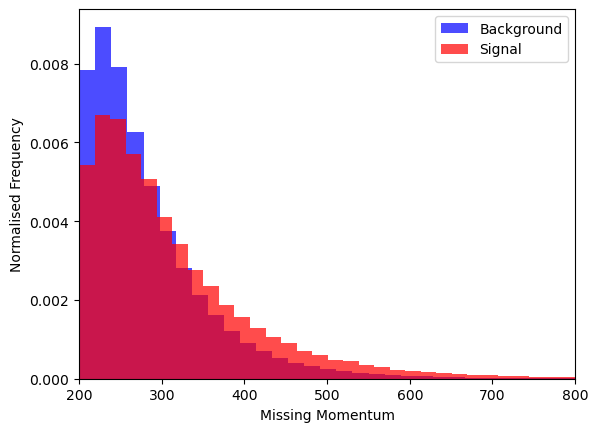

In [14]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.hist(background_data["InputMet_pt"], bins=100, alpha=0.7, label='Background', color='blue', density=True)
plt.hist(signal_data["InputMet_pt"], bins=100, alpha=0.7, label='Signal', color='red', density=True)

plt.xlabel('Missing Momentum')
plt.ylabel('Normalised Frequency')

# Cutoff x axis at 1000
plt.xlim(200,800)

plt.legend(loc='upper right')


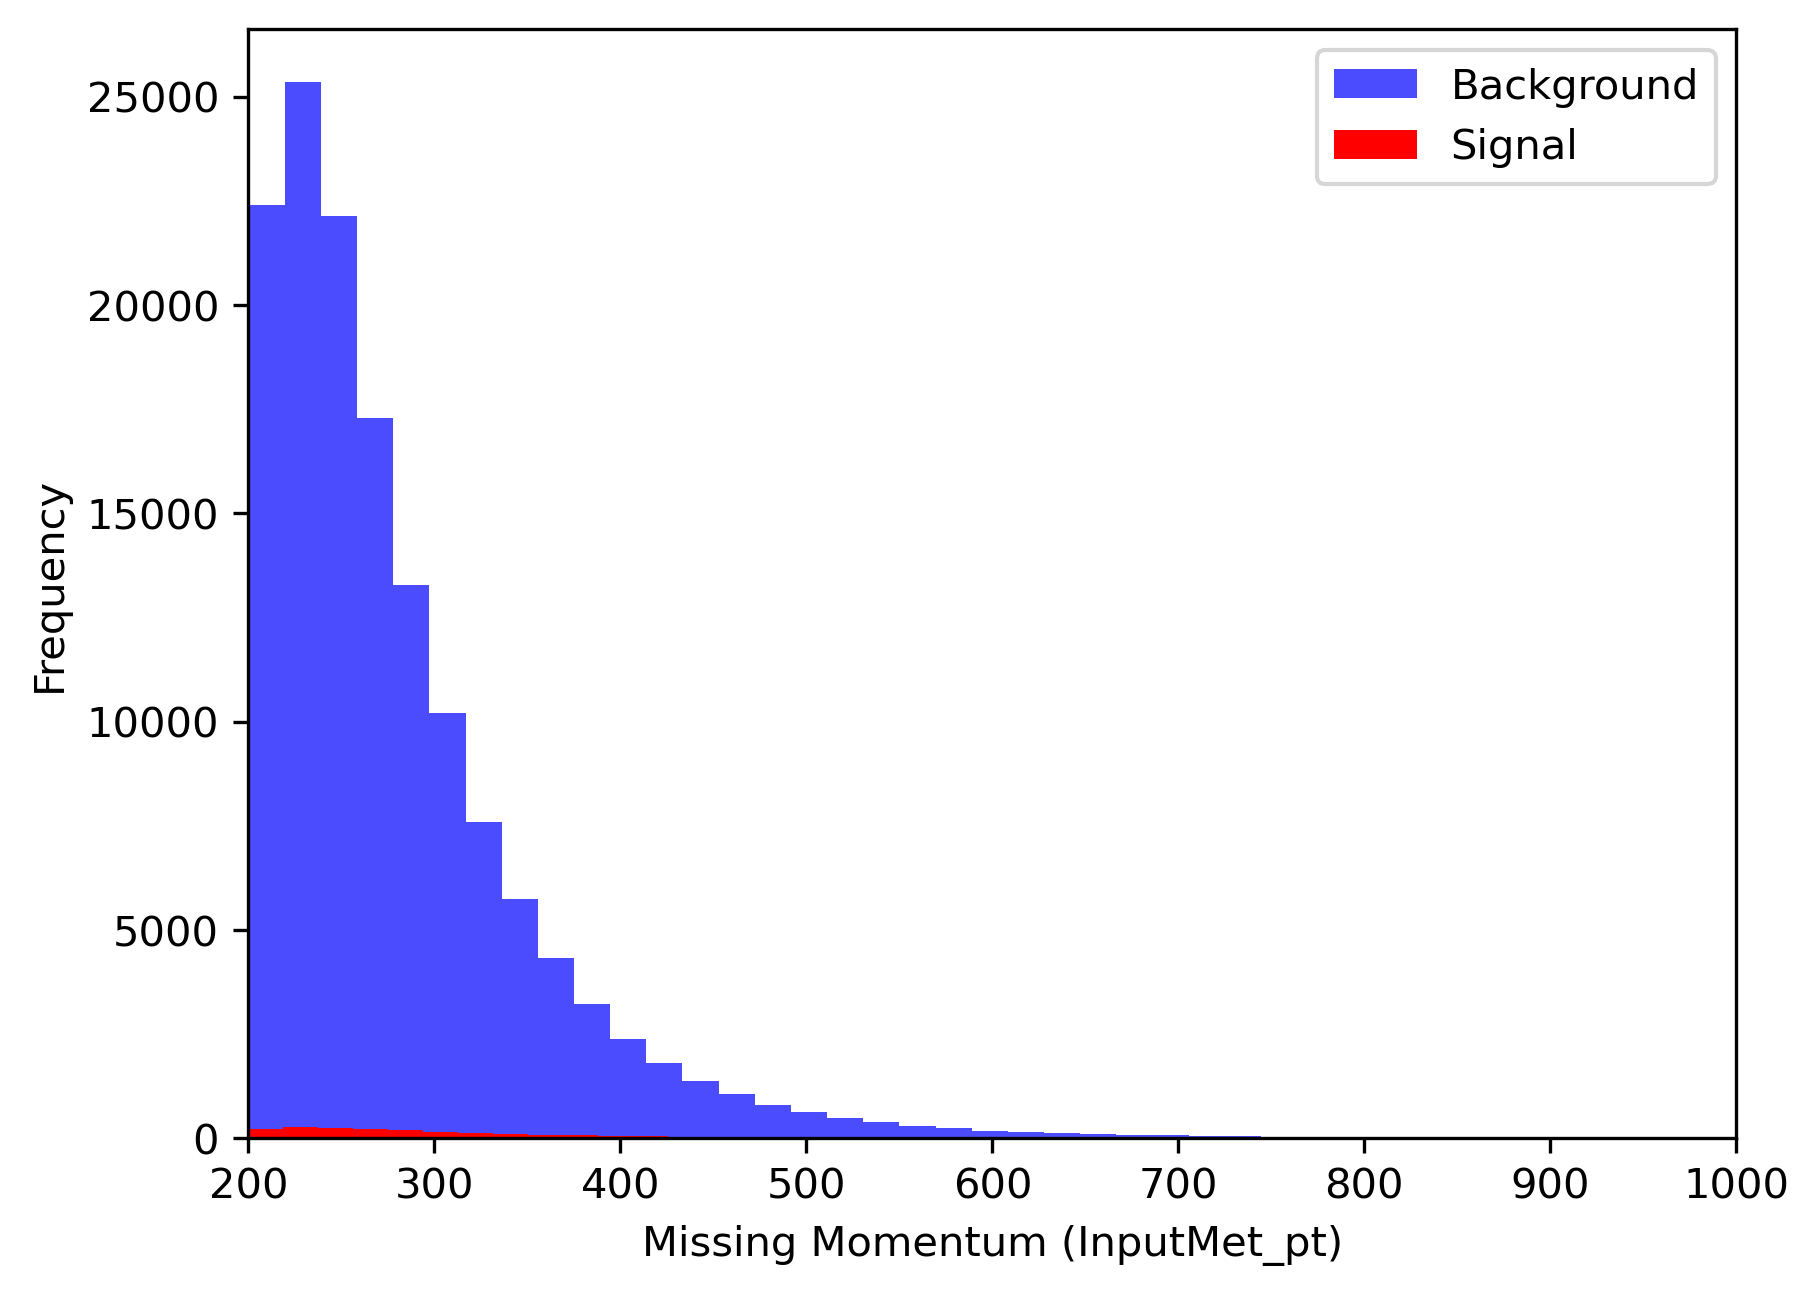

In [15]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_pt"], bins=100, alpha=0.7, label='Background', color='blue', weights=background_data["weight_nominal"]*140000)
plt.hist(signal_data["InputMet_pt"], bins=100, alpha=1, label='Signal', color='red', weights=signal_data["weight_nominal"]*140000)

# plt.yscale('log')
plt.xlabel('Missing Momentum (InputMet_pt)')
plt.ylabel('Frequency')
# plt.xlim(200,400)
plt.xlim(200,1000)

# plt.ylim(0,500)

# background_area = sum(background_hist[0])  # Sum of frequencies for background
# signal_area = sum(signal_hist[0])          # Sum of frequencies for signal

# # Print the areas (total frequencies)
# print(f"Total area under the background histogram: {background_area}")
# print(f"Total area under the signal histogram: {signal_area}")

plt.legend(loc='upper right')

# Print the total area of signal and background data

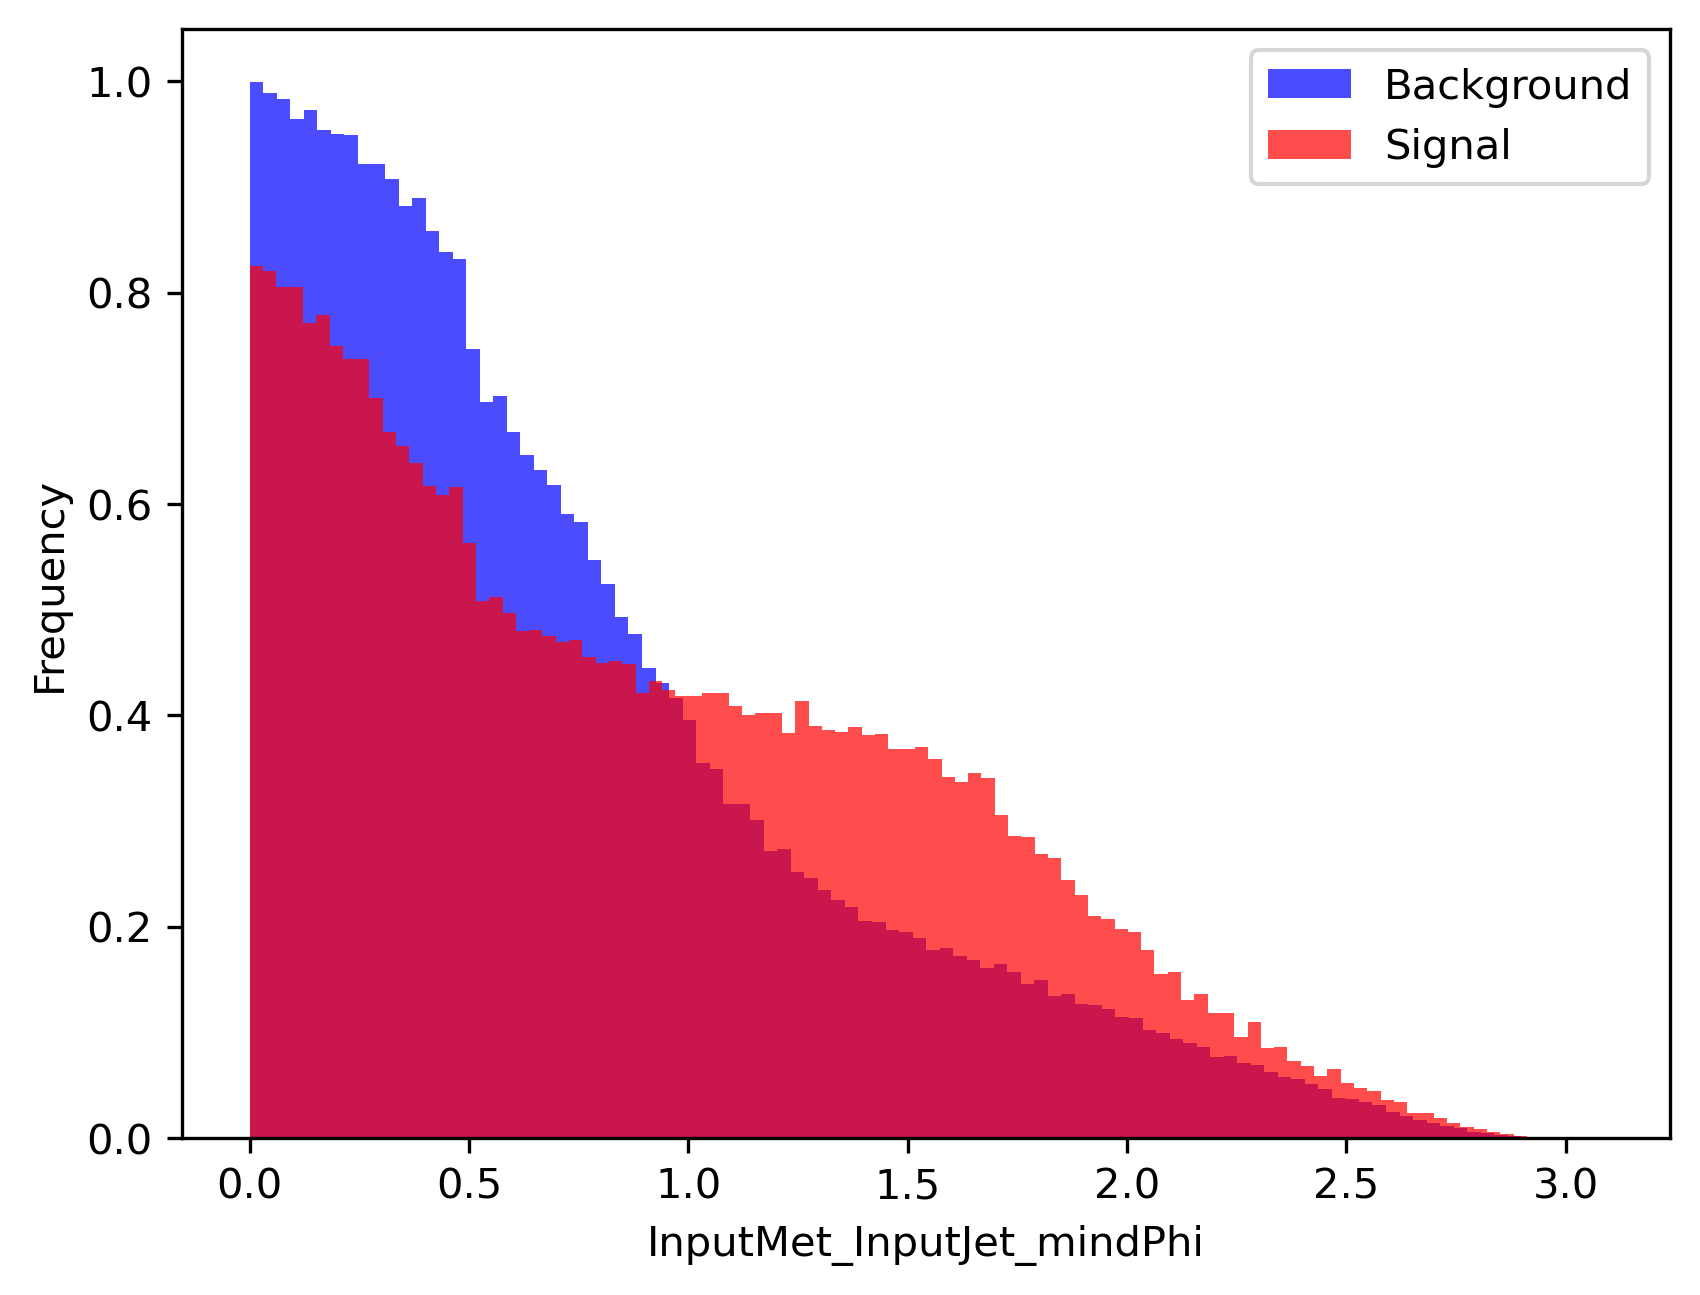

In [24]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_InputJet_mindPhi"], bins=100, alpha=0.7, label='Background', color='blue', density=True)
plt.hist(signal_data["InputMet_InputJet_mindPhi"], bins=100, alpha=0.7, label='Signal', color='red', density=True)

# plt.yscale('log')
plt.xlabel('InputMet_InputJet_mindPhi')
plt.ylabel('Frequency')

plt.legend(loc='upper right')


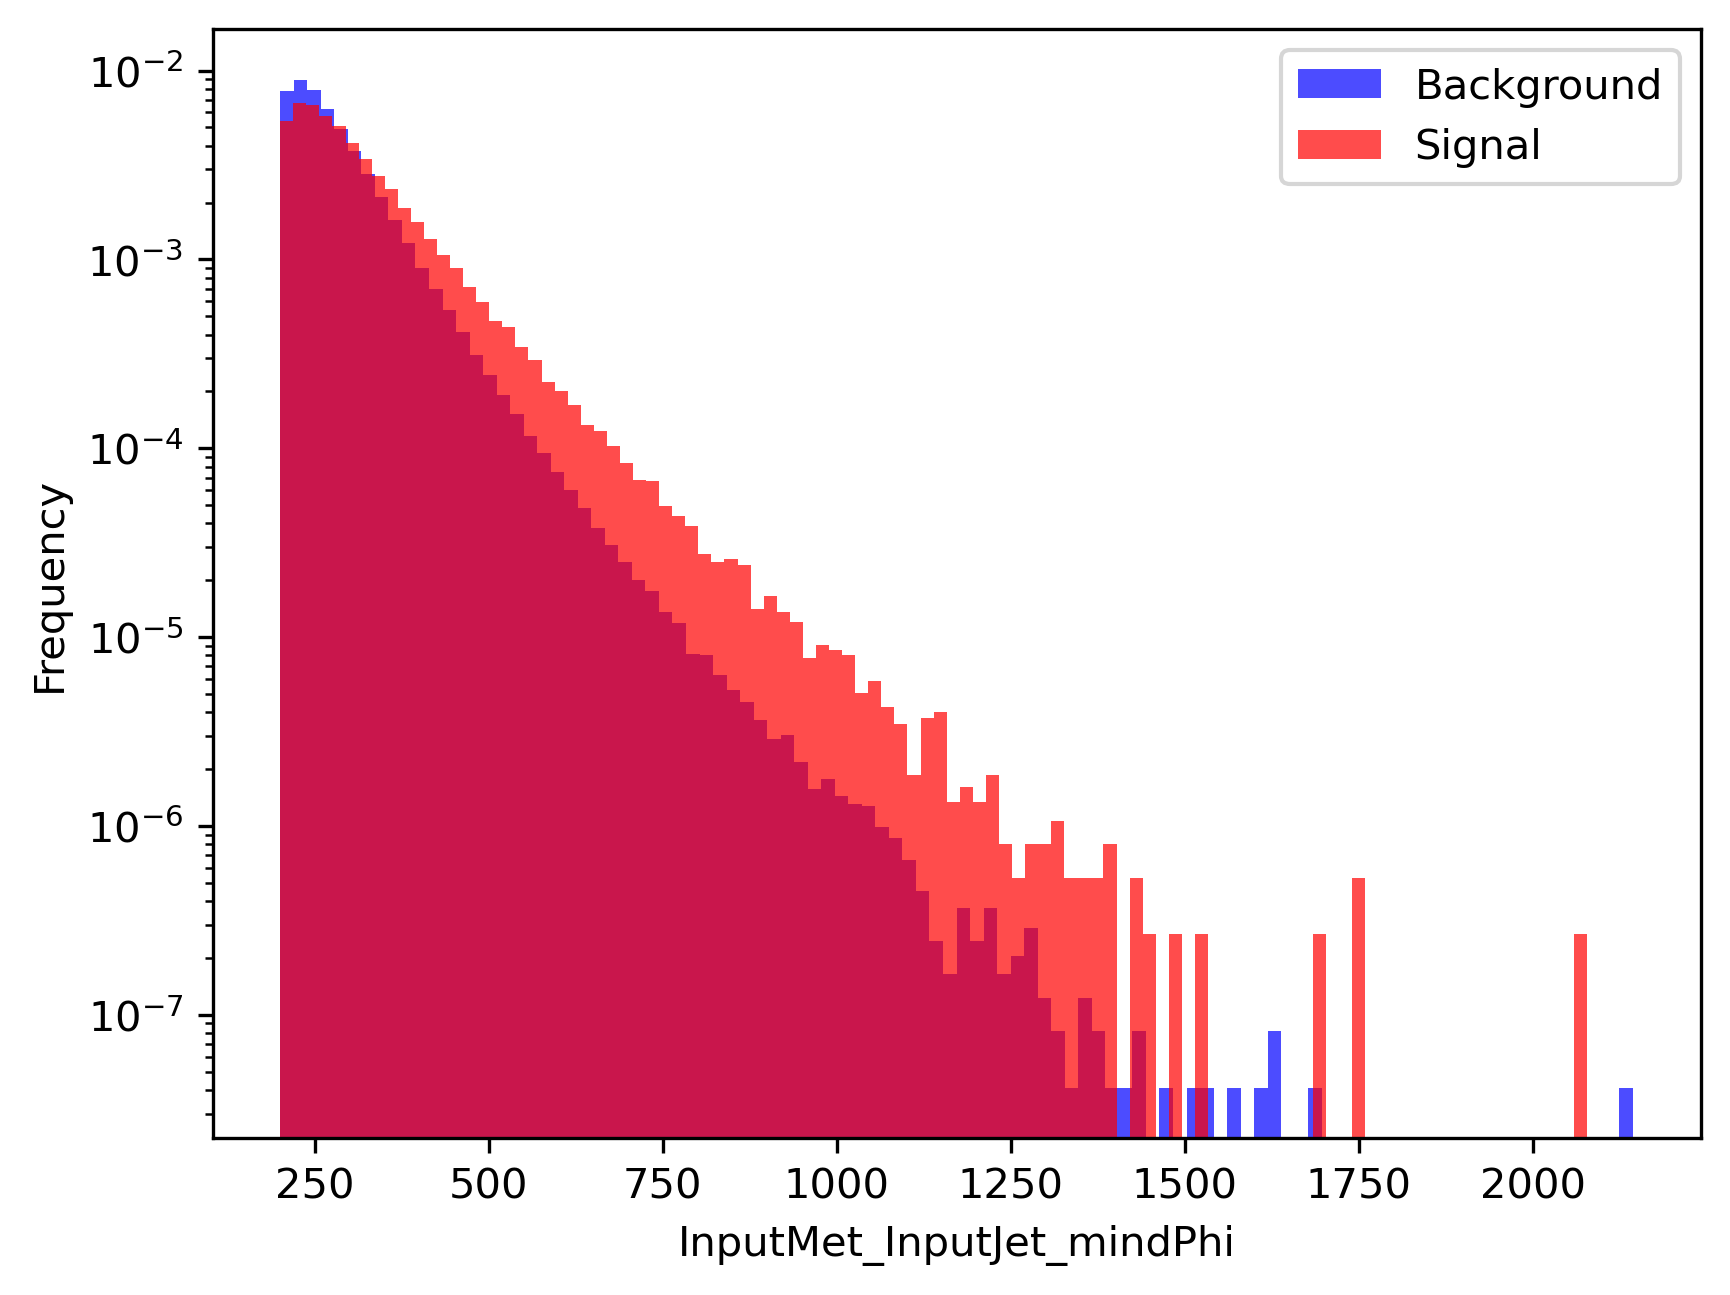

In [22]:
# Plot the signal and background data

import matplotlib.pyplot as plt

# Create histograms for missing momentum for signal and background

plt.figure(dpi=300)
plt.hist(background_data["InputMet_pt"], bins=100, alpha=0.7, label='Background', color='blue', density=True)
plt.hist(signal_data["InputMet_pt"], bins=100, alpha=0.7, label='Signal', color='red', density=True)

plt.yscale('log')
plt.xlabel('InputMet_InputJet_mindPhi')
plt.ylabel('Frequency')

plt.legend(loc='upper right')